In [31]:
from datetime import datetime

import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [16]:
data = pd.read_csv('data/real_estate_price_size.csv')
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [17]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


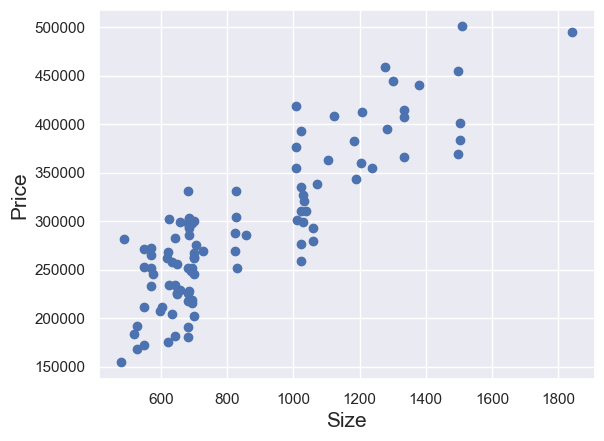

In [18]:
y1 = data['price']
x1 = data['size']

plt.scatter(x1,y1)
plt.xlabel('Size', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

In [19]:
x = sm.add_constant(x1)
result = sm.OLS(y1, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           8.13e-31
Time:                        15:36:39   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

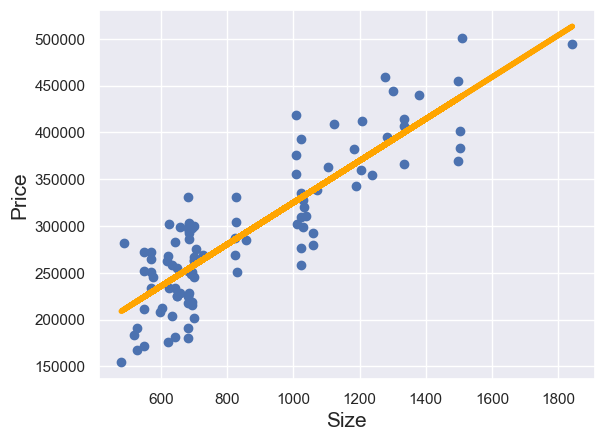

In [20]:
plt.scatter(x1,y1)
yhat = 223.1787*x1 + 1.019e+05
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('Size', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

In [33]:
data_wyear = pd.read_csv('data/real_estate_price_size_year.csv')
data_wyear['Delta Time'] = dt.now().year - data_wyear['year']
data_wyear.head()

,price,size,year,Delta Time
0,234314.144,643.09,2015,10
1,228581.528,656.22,2009,16
2,281626.336,487.29,2018,7
3,401255.608,1504.75,2015,10
4,458674.256,1275.46,2009,16


In [36]:
y1 = data_wyear['price']
x1 = data_wyear[['size', 'year']]

In [37]:
x = sm.add_constant(x1)
result = sm.OLS(y1, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           2.77e-32
Time:                        20:52:44   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""